In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

# Data Preparation

## Data set Explanation



The data set consist of the top 3120 football players from across the world. This dataset is scrapped from SoFIFA.com and is made readily available via Kaggle in a excel or csv format for researchers like us to do more data-analysis on it. It has a total of 65 variable columns.

**General Idea**

The core idea of the analysis or this project is to see how the overall rating of the player is influenced by different skill levels.

To put it simply, the important idea is to try to identify which skills and attributes contribute most significantly to a high overall rating.

This is to say that our dependent variable will be overall rating and the independent variable will be as follows:

* Total attacking metrics (e.g., Crossing, Finishing, Short passing).

* Total skill attributes (e.g., Dribbling, Ball control, Curve).

* Total movement attributes (e.g., Acceleration, Sprint speed, Agility).

* Total defending and Total mentality (e.g., Aggression, Interceptions).

Now, lets proceed with downloading the dataset and give a brief look at the initial rows for understanding the dataset and potential speculations.

In [2]:
footy_df = pd.read_csv("players_3120.csv")
footy_df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,10,1960,405,1,72,70,80,81,52,NaN


In [3]:
footy_df.shape

(3120, 65)

Column `Unamed:64` seem to have all missing values. However, it would not be a problem as we will drop this column anayways.

In [4]:
# missing values presence in each coloum--- coloumn unamed:64 seem to have all missing values.
missing_values = footy_df.isnull().sum()
print(missing_values)

name                       0
Age                        0
Overall rating             0
Potential                  0
Team & Contract            0
                        ... 
Shooting / Handling        0
Passing / Kicking          0
Dribbling / Reflexes       0
Defending / Pace           0
Unnamed: 64             3120
Length: 65, dtype: int64


## Dropping irrelevent variables



Given that we are trying to see the factors that have an influence on the overall rating, we only keep the relevent variables and drop the irrelavent ones. The variables that would have no effect or influnce in the analysis are as follows:

*   `Name`, `Potential`, `Team & Contract`, `Foot`,`Best Overall`,`Release Clause`,`Total Stats`,`Base Stats`,`International Reputation`,`Pace/Diving`,`Shooting/Handling`,`Passing/Kicking`,`Dribbling/Reflexs`,`Defemdomh/Pace`, `Unnamed64`,

* Varibales like `Name` wont make any difference to our analysis as we are trying to see overall rating and even if it effects our analysis somehow, we still have a unique id set in numerical terms for each player.

* Varibales like `Potential`, `Team & Contract`, `Foot`,`Best Overall`,`Release Clause`,`Unnamed64` have no relation to our analysis whatsoever.

* `Total Stats` will generate a problem of multicolinearity and hence we drop this variable. By this, what I mean is that if we include total stats and also indiviual based stats like skills, dribbling also, then there will be double counting which causes multicolinearity issue.

* `International Reputation` here is most likely the level of leagues they are playing. But if the international reputations rank is already low or high, the overall rating of the skills, dribblings and so on will be rated accordingly as well. Hence, I dont see a point for me to include this in the analysis as it doesnot effect my analysis at all.

* Variables such as `Pace/Diving`, `Shooting/Handling`, `Passing/Kicking`, `Dribbling/Reflexes`, and `Defending/Pace` could provide valuable insights for analyzing the performance ratios of players based on their positions. However, for this particular analysis, the focus is on understanding the relationship between player ratings and position-specific skills. Including these additional variables could introduce multicollinearity issues, making the results less reliable and harder to interpret. Therefore, to ensure a smoother and more robust analysis, I decided to exclude these variables and concentrate on the core attributes directly tied to position-based player talents.

Now, lets proceed with replicating the explanation in code:

In [5]:
# drop irrelavent variables
footy_df = footy_df.drop(['name','Potential','Team & Contract', 'foot','Best overall','Release clause','Total stats','Base stats','International reputation','Pace / Diving','Shooting / Handling','Passing / Kicking','Dribbling / Reflexes','Defending / Pace', 'Unnamed: 64'], axis=1)
footy_df.head()
footy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  3120 non-null   int64 
 1   Overall rating       3120 non-null   object
 2   ID                   3120 non-null   int64 
 3   Height               3120 non-null   object
 4   Weight               3120 non-null   object
 5   Best position        3120 non-null   object
 6   Growth               3120 non-null   int64 
 7   Value                3120 non-null   object
 8   Wage                 3120 non-null   object
 9   Total attacking      3120 non-null   int64 
 10  Crossing             3120 non-null   object
 11  Finishing            3120 non-null   object
 12  Heading accuracy     3120 non-null   object
 13  Short passing        3120 non-null   object
 14  Volleys              3120 non-null   object
 15  Total skill          3120 non-null   int64 
 16  Dribbl

The dataset contains values in a format such as `75+2` in some columns, which can complicate analysis. To address this, these values will be converted into numerical values by summing the numbers (e.g., `75+2` becomes `77`). This ensures that the data is consistent and allows for easier calculations, such as determining the average rating for each position.

In [6]:
# Function to evaluate expressions in each cell
def evaluate_cell(value):
    if isinstance(value, str):
        try:
            return eval(value)
        except:
            return value
    else:
        return value

# Apply it to all columns
footy_df = footy_df.applymap(evaluate_cell)
footy_df.info()
footy_df.head(50)

<ipython-input-6-347e59ec5b9f>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  footy_df = footy_df.applymap(evaluate_cell)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  3120 non-null   int64 
 1   Overall rating       3120 non-null   int64 
 2   ID                   3120 non-null   int64 
 3   Height               3120 non-null   object
 4   Weight               3120 non-null   object
 5   Best position        3120 non-null   object
 6   Growth               3120 non-null   int64 
 7   Value                3120 non-null   object
 8   Wage                 3120 non-null   object
 9   Total attacking      3120 non-null   int64 
 10  Crossing             3120 non-null   int64 
 11  Finishing            3120 non-null   int64 
 12  Heading accuracy     3120 non-null   int64 
 13  Short passing        3120 non-null   int64 
 14  Volleys              3120 non-null   int64 
 15  Total skill          3120 non-null   int64 
 16  Dribbl

,Age,Overall rating,ID,Height,Weight,Best position,Growth,Value,Wage,Total attacking,...,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,34,78,28130,"182cm / 6'0""",76kg / 168lbs,CAM,0,€4.1M,€45K,367,...,78,25,28,25,54,7,14,13,6,14
1,19,65,260145,"174cm / 5'9""",65kg / 143lbs,CAM,16,€1.8M,€3K,266,...,140,40,49,51,39,10,7,9,5,8
2,23,82,231410,"170cm / 5'7""",68kg / 150lbs,CAM,4,€43.5M,€145K,328,...,84,40,23,21,51,13,9,13,10,6
3,17,62,70728,"178cm / 5'10""",72kg / 159lbs,CAM,18,€1M,€900,257,...,161,50,55,56,48,9,13,7,11,8
4,18,77,264309,"175cm / 5'9""",70kg / 154lbs,CAM,11,€22M,€41K,340,...,155,52,57,46,58,13,10,11,14,10
5,26,74,225667,"168cm / 5'6""",69kg / 152lbs,ST,1,€5M,€19K,358,...,131,50,38,43,65,13,16,10,14,12
6,18,77,240833,"179cm / 5'10""",72kg / 159lbs,ST,10,€22.5M,€18K,343,...,86,30,31,25,60,13,13,11,10,13
7,24,82,235790,"193cm / 6'4""",82kg / 181lbs,CAM,5,€46M,€110K,404,...,133,45,47,41,47,6,8,11,10,12
8,20,88,252371,"186cm / 6'1""",75kg / 165lbs,CAM,4,€128.5M,€230K,385,...,233,77,79,77,48,14,11,10,5,8
9,23,74,246685,"182cm / 6'0""",70kg / 154lbs,LWB,6,€6M,€15K,296,...,203,69,69,65,51,13,6,9,10,13


In [7]:
footy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  3120 non-null   int64 
 1   Overall rating       3120 non-null   int64 
 2   ID                   3120 non-null   int64 
 3   Height               3120 non-null   object
 4   Weight               3120 non-null   object
 5   Best position        3120 non-null   object
 6   Growth               3120 non-null   int64 
 7   Value                3120 non-null   object
 8   Wage                 3120 non-null   object
 9   Total attacking      3120 non-null   int64 
 10  Crossing             3120 non-null   int64 
 11  Finishing            3120 non-null   int64 
 12  Heading accuracy     3120 non-null   int64 
 13  Short passing        3120 non-null   int64 
 14  Volleys              3120 non-null   int64 
 15  Total skill          3120 non-null   int64 
 16  Dribbl

While cleaning the data I noticed that the metrics `Total attacking`, `Total skill`, `Total movement`, `Total power`, and `Total defense` are sums of several other sub-variables that came under them. Hence, to ensure consistency in the dataset and to simplify the analysis, we will calculate the average for each of these metrics (sub-variable) instead of using their total values. This approach will help maintain uniformity and reduce potential issues when running regression analyses.

In [8]:
footy_df['Total attacking'] = ((footy_df['Crossing'] + footy_df['Finishing'] + footy_df['Heading accuracy'] + footy_df['Short passing'] + footy_df['Volleys'])/5).round(2)
footy_df['Total skill'] = ((footy_df['Dribbling'] + footy_df['Curve'] + footy_df['FK Accuracy'] + footy_df['Long passing'] + footy_df['Ball control'])/5).round(2)
footy_df['Total movement'] = ((footy_df['Acceleration'] + footy_df['Sprint speed'] + footy_df['Agility'] + footy_df['Reactions'] + footy_df['Balance'])/5).round(2)
footy_df['Total power'] = ((footy_df['Shot power'] + footy_df['Jumping'] + footy_df['Stamina']+ footy_df['Strength']+ footy_df['Long shots'])/5).round(2)
footy_df['Total mentality'] = ((footy_df['Aggression'] + footy_df['Interceptions'] + footy_df['Att. Position'] + footy_df['Vision'] + footy_df['Penalties'] + footy_df['Composure'])/6).round(2)
footy_df['Total defending']= ((footy_df['Defensive awareness'] + footy_df['Standing tackle'] + footy_df['Sliding tackle'])/3).round(2)
footy_df

,Age,Overall rating,ID,Height,Weight,Best position,Growth,Value,Wage,Total attacking,...,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,34,78,28130,"182cm / 6'0""",76kg / 168lbs,CAM,0,€4.1M,€45K,73.4,...,26.00,25,28,25,54,7,14,13,6,14
1,19,65,260145,"174cm / 5'9""",65kg / 143lbs,CAM,16,€1.8M,€3K,53.2,...,46.67,40,49,51,39,10,7,9,5,8
2,23,82,231410,"170cm / 5'7""",68kg / 150lbs,CAM,4,€43.5M,€145K,65.6,...,28.00,40,23,21,51,13,9,13,10,6
3,17,62,70728,"178cm / 5'10""",72kg / 159lbs,CAM,18,€1M,€900,51.4,...,53.67,50,55,56,48,9,13,7,11,8
4,18,77,264309,"175cm / 5'9""",70kg / 154lbs,CAM,11,€22M,€41K,68.0,...,51.67,52,57,46,58,13,10,11,14,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,19,65,270403,"178cm / 5'10""",69kg / 152lbs,CDM,13,€1.6M,€3K,50.8,...,64.33,65,66,62,62,13,11,13,11,14
3116,20,62,270461,"180cm / 5'11""",81kg / 179lbs,LWB,10,€825K,€1K,48.2,...,57.33,57,58,57,54,8,13,13,13,7
3117,19,70,270529,"190cm / 6'3""",85kg / 187lbs,GK,13,€2.9M,€2K,14.0,...,15.67,20,14,13,348,71,69,69,70,73
3118,17,54,270594,"189cm / 6'2""",88kg / 194lbs,ST,15,€250K,€500,44.6,...,15.33,19,15,12,53,6,9,11,14,13


I thought it would be interesting to see how height and weight correlates with the overall rating. So, lets first change the height and weight obseravtaions in numeric values right now, so that we can smoothly generate the plot at the end after finishing up with all the cleaning process.

In [9]:
# changing Height into numeric for easy graph generation later
footy_df["Height in cm"] = footy_df["Height"].str[:3]
footy_df["Height in cm"] = pd.to_numeric(footy_df["Height in cm"], errors='coerce')
footy_df["Height in cm"]

,Height in cm
0,182
1,174
2,170
3,178
4,175
...,...
3115,178
3116,180
3117,190
3118,189


In [10]:
# changing Weight into numeric for easy graph generation later
footy_df["Weight in kg"] = footy_df["Weight"].str[:3].str.replace("k", "").str.replace("K", "")
footy_df["Weight in kg"] = pd.to_numeric(footy_df["Weight in kg"], errors='coerce')
footy_df["Weight in kg"]

,Weight in kg
0,76
1,65
2,68
3,72
4,70
...,...
3115,69
3116,81
3117,85
3118,88


In [11]:
def convert_value_to_numeric(value):
    """Convert string market values like '4.1M' to numeric values."""
    value = value.replace('€', '')  # Remove euro sign if present
    if 'M' in value:
        return float(value.replace('M', '')) * 1_000_000  # Convert millions
    elif 'K' in value:
        return float(value.replace('K', '')) * 1_000  # Convert thousands
    else:
        return float(value)  # Convert numbers without suffix

In [13]:
# Apply the function to the "Value" column
footy_df['Value'] = footy_df['Value'].apply(convert_value_to_numeric)
footy_df['Wage'] = footy_df['Wage'].apply(convert_value_to_numeric)

We had to convert the strings containing the value for players into numeric data.

# Plotting

In [16]:
df = footy_df

## Histograms

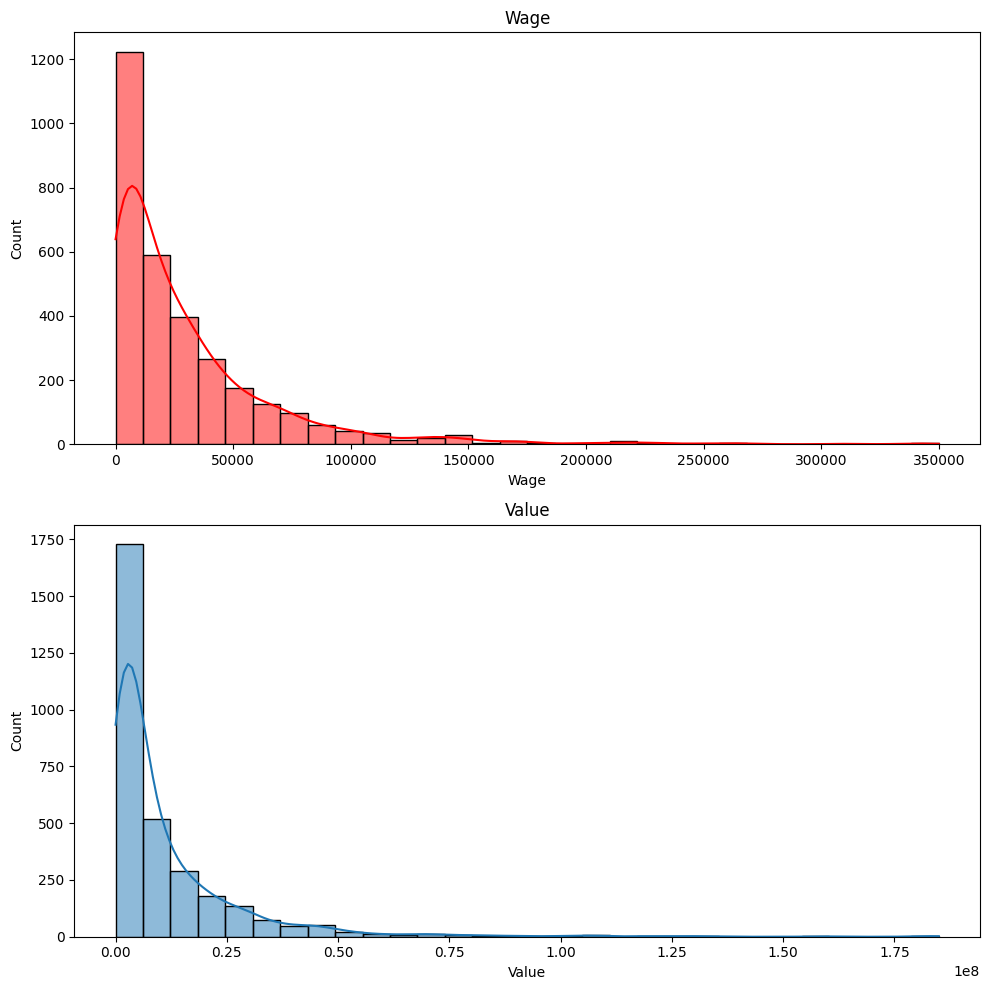

In [17]:
fig, axis = plt.subplots(2,figsize=(10,10))
sns.histplot(df['Wage'],color='Red',bins=30,kde=True,ax=axis[0])
axis[0].set_title("Wage")
sns.histplot(df['Value'],bins=30,kde=True,ax=axis[1])
axis[1].set_title("Value")
plt.tight_layout()
plt.show()

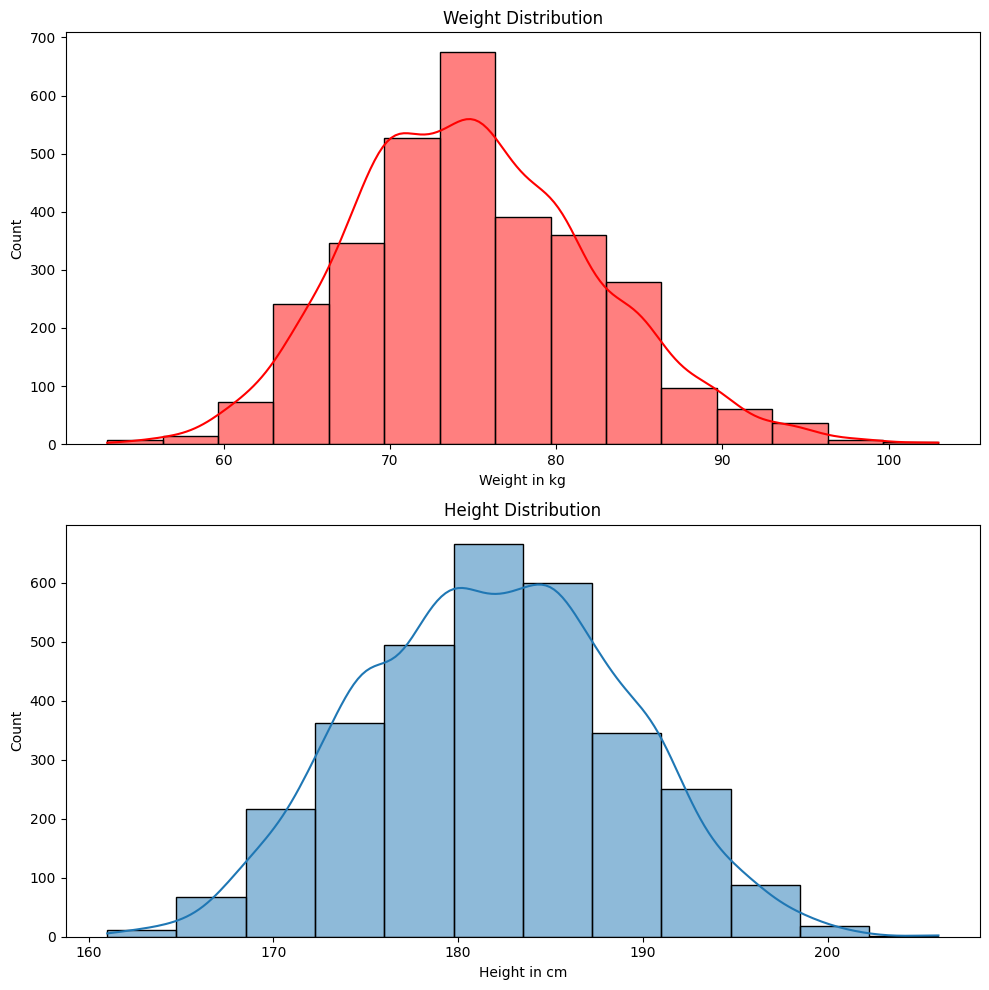

In [18]:
fig, axis = plt.subplots(2,figsize=(10,10))
sns.histplot(df['Weight in kg'],color='Red',bins=15,kde=True,ax=axis[0])
axis[0].set_title("Weight Distribution")
sns.histplot(df['Height in cm'],bins=12,kde=True,ax=axis[1])
axis[1].set_title("Height Distribution")
plt.tight_layout()
plt.show()

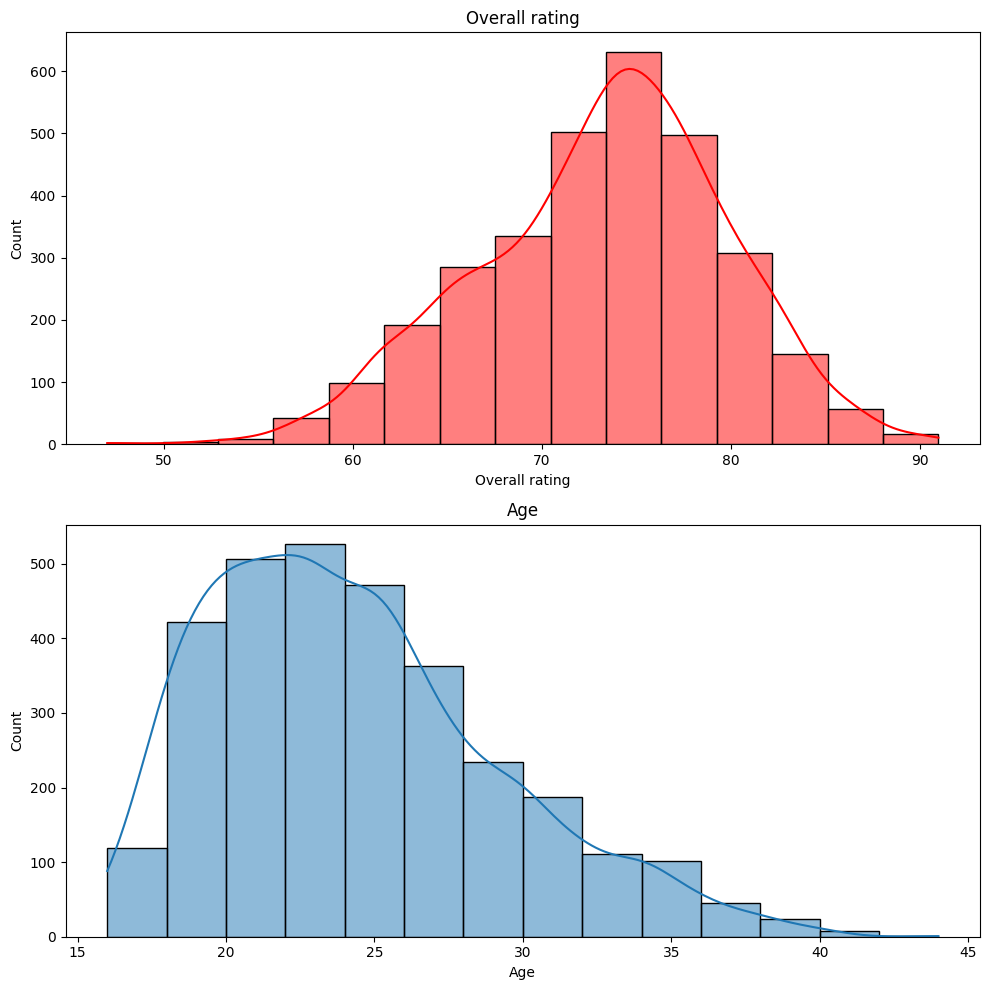

In [19]:
fig, axis = plt.subplots(2,figsize=(10,10))
sns.histplot(df['Overall rating'],color='Red',bins=15,kde=True,ax=axis[0])
axis[0].set_title("Overall rating")
sns.histplot(df['Age'],bins=14,kde=True,ax=axis[1])
axis[1].set_title("Age")
plt.tight_layout()
plt.show()

## Multivariate

### Plot 1: Correlaton Heatmap: Height/Weight to Overall Rating


I wanted to see how strongly is height and weight correlated with overall rating. And hence, I thought it would be quite interesting to generate a brief heatmap and try to see if the common belief in football—that height and weight are less significant for strikers and midfielders—holds true statistically or not.

**Result**

* ***Height and Overall Rating*** : The correlation is very weak (0.032), which is to say that almost no relationship between a player's height and their overall rating.

* ***Weight and Overall Rating*** : The correlation is weak (0.14), which is to say that a player's weight has little influence on their overall rating.

  This is also a very interesting finding as there are many players whose height and weight are relatively very low but they seem to be one of the best players in the world. The body mass and height of legendary players like Lionel Messi, Xavi Hernandez, Andres Iniesta, Diego Maradona, Neymar and Pele among others are a clear and fresh example of similar scenario.

  However, having said that, there is some limitations with this findings in the case of goalkeepers and defenders. Defenders are usually expected to be tall and strong as they do the dirty work for the team by playing aggressive football, which requires strong body and taller height, rather than pure skills and passing qualities like that of strikers and midfilders.


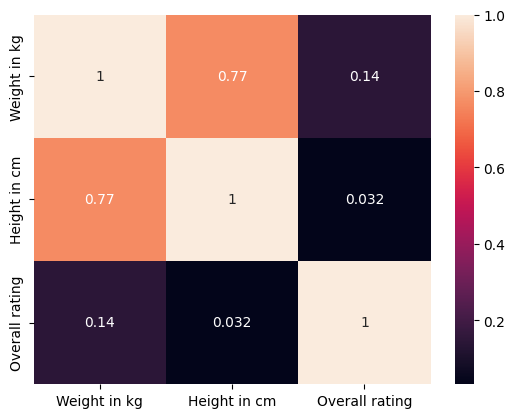

In [14]:
correlation = footy_df[['Weight in kg', 'Height in cm', "Overall rating"]].corr()
sns.heatmap(correlation, annot=True)
plt.show()

### Plot 2: Bivariate plot variations

In [20]:
box_data = [df[df['ATT']==True]['Age'],df[df['DEF']==True]['Age'],df[df['MID']==True]['Age'],df[df['GK']==True]['Age']]
bar_data = [df[df['ATT']==True]['Value'].mean(),df[df['DEF']==True]['Value'].mean(),df[df['MID']==True]['Value'].mean(),df[df['GK']==True]['Value'].mean()]
bar_data2 = [df[df['ATT']==True]['Total skill'].mean(),df[df['DEF']==True]['Total skill'].mean(),df[df['MID']==True]['Total skill'].mean(),df[df['GK']==True]['Total skill'].mean()]

#bar datanak valami jobbat kell találni mint total movement...

fig, axis = plt.subplots(2,2,figsize=(20, 15))

axis[0,0].plot(df.groupby('Age').mean(numeric_only=True).index,df.groupby('Age').mean(numeric_only=True)['Wage'],color='blue',linestyle="--")
axis[0,0].set_title("Wage over the years")
axis[0,0].set_xlabel("age")
axis[0,0].set_ylabel("wage")
axis[0,0].grid(True)

axis[0,1].scatter(df['Overall rating'],df['Age'],color="lightcoral")
axis[0,1].set_title("Rating over the years")
axis[0,1].set_ylabel("age")
axis[0,1].set_xlabel("rating")
axis[0,1].grid(True)

width = 0.4
categories = ['ATT','DEF','MID','GK']
x = np.arange(len(categories))

ax1 = axis[1, 0]
ax1.bar(x - width/2, bar_data, width=width, color='green', label='Value')
ax1.set_ylabel("Value")
ax1.set_xlabel("Position")
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_title("Blue: Total skill, Green: Value")

ax2 = ax1.twinx()
ax2.bar(x + width/2, bar_data2, width=width, color='blue', label='Total skill')
ax2.set_ylabel("Total skill")

axis[1,1].boxplot(box_data)
axis[1,1].set_title("Age in different categories")
axis[1,1].set_ylabel("age")
axis[1,1].set_xticklabels(['ATT','DEF','MID','GK'])

plt.tight_layout()
plt.show()

KeyError: 'ATT'

# Analysis

In [21]:
describe = ['Age','Overall rating','Height in cm','Weight in kg','Wage','Value']
df[describe].describe()

,Age,Overall rating,Height in cm,Weight in kg,Wage,Value
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3.120000e+03
mean,24.218590,73.257692,181.878846,75.080128,30143.926282,1.140531e+07
std,4.876116,6.615507,7.023804,7.314226,38461.970814,1.723692e+07
min,16.000000,47.000000,161.000000,53.000000,0.000000,0.000000e+00
25%,20.000000,69.000000,177.000000,70.000000,5000.000000,2.000000e+06
50%,23.000000,74.000000,182.000000,75.000000,18000.000000,5.000000e+06
75%,27.000000,78.000000,187.000000,80.000000,40000.000000,1.450000e+07
max,44.000000,91.000000,206.000000,103.000000,350000.000000,1.850000e+08


In [22]:
df[describe].corr()

,Age,Overall rating,Height in cm,Weight in kg,Wage,Value
Age,1.000000,0.540750,0.059507,0.232763,0.308340,0.109040
Overall rating,0.540750,1.000000,0.032467,0.143033,0.679216,0.679210
Height in cm,0.059507,0.032467,1.000000,0.768013,0.032907,0.022511
Weight in kg,0.232763,0.143033,0.768013,1.000000,0.089597,0.053156
Wage,0.308340,0.679216,0.032907,0.089597,1.000000,0.785952
Value,0.109040,0.679210,0.022511,0.053156,0.785952,1.000000


In [23]:
X_original = df[describe]  # Independent variables
y = df['Value']  # Dependent variable

# Add constant for intercept
X_original = sm.add_constant(X_original)

# Run regression
model_original = sm.OLS(y, X_original).fit()
print(model_original.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.540e+31
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:54:30   Log-Likelihood:                 47858.
No. Observations:                3120   AIC:                        -9.570e+04
Df Residuals:                    3113   BIC:                        -9.566e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.192e-07    3.3e-08     -3.

In [24]:
# T-test for comparing Value means for different positions
from scipy.stats import ttest_ind
group_a = df[df['ATT'] == True]['Value']
group_b = df[df['DEF'] == True]['Value']
t_stat, p_value = ttest_ind(group_a, group_b)
print(f"T-test p-value: {p_value:.4f}\nT-test t-statistic: {t_stat:.4f}")

KeyError: 'ATT'